In [1]:
import csv
from datetime import datetime
import matplotlib.pylab as plt

In [3]:
logs = []
for j in ["01", "02", "03", "04", "05", "06","08","09","10"]:
    nodes = 11
    if (j == "10"):
        nodes = 12
    for i in range(nodes):
        fname = "sp19-cs425-g10-"+j+".cs.illinois.edu_"+str(9000+i)+".log"
        logs.append([])
        with open(fname) as f:
            reader = csv.reader(f, delimiter=' ')
            for row in reader:
                if (len(row) != 0 and row[0] == "SWITCH"):
                    print(row)
                    print(fname)
                if (len(row) != 0 and row[0] == "Bandwith"):
                    logs[i].append(row)

In [4]:
send = {}
recieve = {}
for log in logs:
    for entry in log:
        if (entry[1] == "Send"):
            if entry[2] not in send:
                send[entry[2]] = int(entry[3])
            else:
                send[entry[2]] += int(entry[3])
        if (entry[1] == "Recieve"):
            if entry[2] not in recieve:
                recieve[entry[2]] = int(entry[3])
            else:
                recieve[entry[2]] += int(entry[3])

<Figure size 1440x720 with 0 Axes>

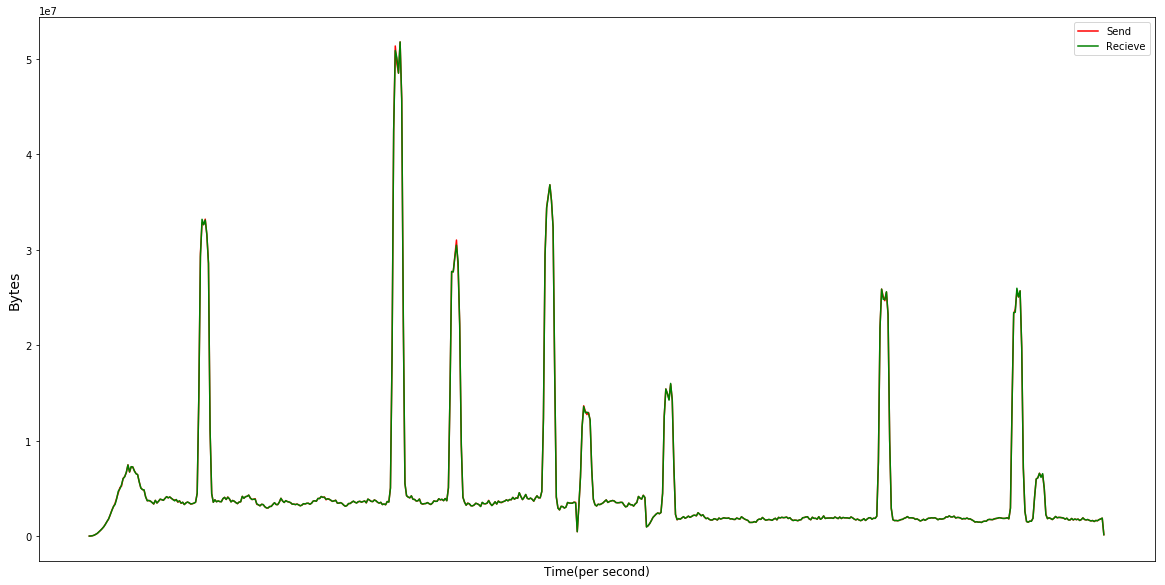

In [5]:
lists1 = sorted(send.items()) # sorted by key, return a list of tuples
x1, y1 = zip(*lists1) # unpack a list of pairs into two tuples
lists2 = sorted(recieve.items()) # sorted by key, return a list of tuples
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples

import matplotlib.dates as mdates

fig = plt.figure(figsize=(20,10))
plt.figure(figsize=(20,10))
plt.plot(x1, y1, 'r')
plt.plot(x2, y2, 'g')
plt.gca().legend(('Send','Recieve'))
plt.xlabel('Time(per second)', fontsize=12)
plt.ylabel('Bytes', fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
plt.savefig("bandwidth.png", dpi=fig.dpi)
plt.show()

In [6]:
i = int(0.8 * 1e7)

In [7]:
i

8000000